# Linear Regression assignment

## description

In [386]:
# importing all the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [387]:
data=pd.read_csv('CarPrice_Assignment.csv')

In [388]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
car_ID              205 non-null int64
symboling           205 non-null int64
CarName             205 non-null object
fueltype            205 non-null object
aspiration          205 non-null object
doornumber          205 non-null object
carbody             205 non-null object
drivewheel          205 non-null object
enginelocation      205 non-null object
wheelbase           205 non-null float64
carlength           205 non-null float64
carwidth            205 non-null float64
carheight           205 non-null float64
curbweight          205 non-null int64
enginetype          205 non-null object
cylindernumber      205 non-null object
enginesize          205 non-null int64
fuelsystem          205 non-null object
boreratio           205 non-null float64
stroke              205 non-null float64
compressionratio    205 non-null float64
horsepower          205 non-null int64
peakrpm      

In [389]:
data.head()
data=data.drop('car_ID',axis=1)
data=data.drop('CarName',axis=1)

In [390]:
#lets separate the variables into numeric and objects
dtype_float=[]
dtype_obj=[]
for i in data.columns:
    if data[i].describe().dtype==float:
        dtype_float.append(i)
    if data[i].describe().dtype==object:
        dtype_obj.append(i)

In [391]:
data[dtype_obj].describe()

,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205
unique,2,2,2,5,3,2,7,7,8
top,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,185,168,115,96,120,202,148,159,94


In [392]:
# lets see if any categorical data in numeric data
data[dtype_float].nunique()

symboling             6
wheelbase            53
carlength            75
carwidth             44
carheight            49
curbweight          171
enginesize           44
boreratio            38
stroke               37
compressionratio     32
horsepower           59
peakrpm              23
citympg              29
highwaympg           30
price               189
dtype: int64

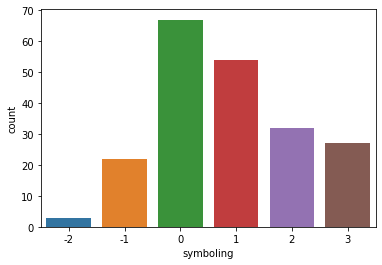

In [393]:
# car symboling shows some categorical properties
sns.countplot(data.symboling)

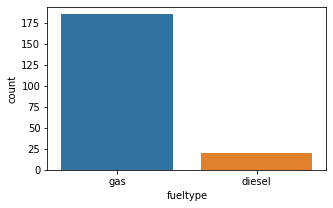

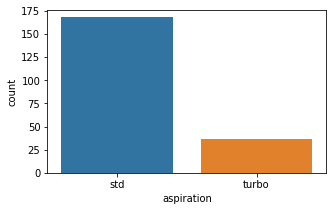

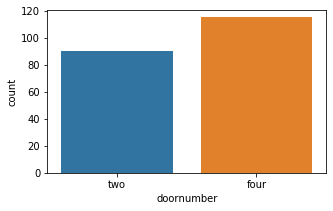

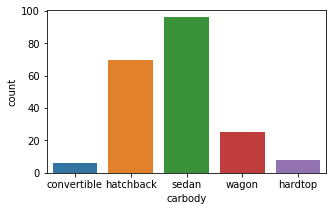

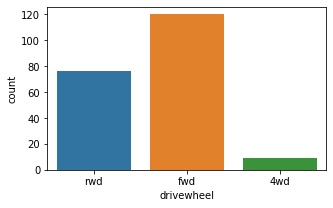

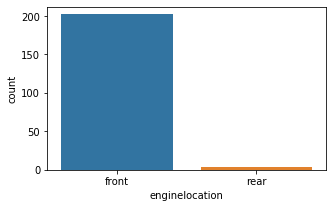

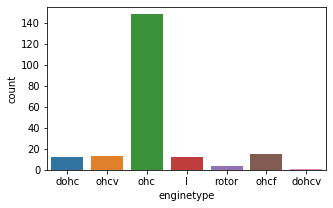

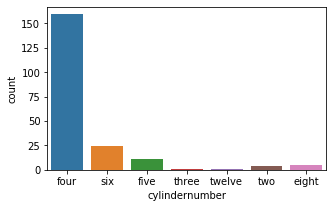

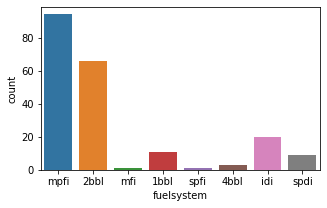

In [394]:
#lets plot all the categorical variables
for i in data[dtype_obj].columns:
    plt.figure(figsize=(5,3))
    sns.countplot(data[i])
    plt.show()

In [395]:
#lets see stats for numeric columns
y=data.price
x=data[dtype_float].drop('price',axis=1)

model=sm.OLS(y,x).fit()
model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                  price   R-squared (uncentered):                   0.959
Model:                            OLS   Adj. R-squared (uncentered):              0.955
Method:                 Least Squares   F-statistic:                              315.2
Date:                Sun, 01 Dec 2019   Prob (F-statistic):                   1.03e-123
Time:                        13:02:39   Log-Likelihood:                         -1942.4
No. Observations:                 205   AIC:                                      3913.
Df Residuals:                     191   BIC:                                      3959.
Df Model:                          14                                                  
Covariance Type:            nonrobust                                                  
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
symboling          104.6048    243.101      0.430      0.667    -374.903     584.113
wheelbase          206.8136    109.521      1.888      0.060      -9.213     422.840
carlength          -92.5613     56.915     -1.626      0.106    -204.824      19.701
carwidth           -97.9771    184.037     -0.532      0.595    -460.984     265.030
carheight            8.3413    129.364      0.064      0.949    -246.825     263.507
curbweight           2.7799      1.758      1.582      0.115      -0.687       6.247
enginesize         116.0490     14.183      8.183      0.000      88.075     144.024
boreratio        -2194.8428   1165.994     -1.882      0.061   -4494.721     105.036
stroke           -3524.1683    784.537     -4.492      0.000   -5071.638   -1976.698
compressionratio   347.9189     83.395      4.172      0.000     183.425     512.412
horsepower          34.0957     16.672      2.045      0.042       1.211      66.981
peakrpm              1.7075      0.657      2.599      0.010       0.412       3.004
citympg           -355.9721    183.196     -1.943      0.053    -717.319       5.375
highwaympg         162.3257    163.738      0.991      0.323    -160.642     485.294
==============================================================================
Omnibus:                       22.227   Durbin-Watson:                   0.920
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               84.485
Skew:                           0.237   Prob(JB):                     4.51e-19
Kurtosis:                       6.109   Cond. No.                     2.96e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.96e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [396]:
#lets see the regression results for object columns data
y=data.price
x=pd.get_dummies(data[dtype_obj])

model=sm.OLS(y,x).fit()
model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.852
Model:                            OLS   Adj. R-squared:                  0.830
Method:                 Least Squares   F-statistic:                     37.81
Date:                Sun, 01 Dec 2019   Prob (F-statistic):           1.40e-59
Time:                        13:02:39   Log-Likelihood:                -1936.5
No. Observations:                 205   AIC:                             3929.
Df Residuals:                     177   BIC:                             4022.
Df Model:                          27                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
fueltype_diesel        3020.1069    442.842      6.820      0.000    2146.178    3894.036
fueltype_gas           4956.4963    552.542      8.970      0.000    3866.078    6046.915
aspiration_std         2247.1651    486.802      4.616      0.000    1286.482    3207.848
aspiration_turbo       5729.4382    517.371     11.074      0.000    4708.428    6750.449
doornumber_four        4591.7315    487.675      9.416      0.000    3629.325    5554.138
doornumber_two         3384.8717    430.509      7.862      0.000    2535.281    4234.462
carbody_convertible    3313.5502   1254.599      2.641      0.009     837.653    5789.448
carbody_hardtop        1113.5187   1133.732      0.982      0.327   -1123.853    3350.890
carbody_hatchback      1032.7725    638.123      1.618      0.107    -226.536    2292.081
carbody_sedan          1517.2402    639.663      2.372      0.019     254.893    2779.587
carbody_wagon           999.5216    846.941      1.180      0.240    -671.879    2670.923
drivewheel_4wd          780.8967    978.092      0.798      0.426   -1149.327    2711.120
drivewheel_fwd         1334.8657    519.302      2.570      0.011     310.044    2359.687
drivewheel_rwd         5860.8408    594.921      9.851      0.000    4686.789    7034.893
enginelocation_front   -504.8887   1200.900     -0.420      0.675   -2874.814    1865.037
enginelocation_rear    8481.4919   1574.588      5.386      0.000    5374.109    1.16e+04
enginetype_dohc        3603.5528   1173.991      3.069      0.002    1286.732    5920.373
enginetype_dohcv      -7944.5232   3389.700     -2.344      0.020   -1.46e+04   -1255.094
enginetype_l           4800.6738   1370.247      3.504      0.001    2096.550    7504.798
enginetype_ohc         5874.6272    937.139      6.269      0.000    4025.223    7724.031
enginetype_ohcf        5530.5789   1291.771      4.281      0.000    2981.324    8079.834
enginetype_ohcv       -1881.0679   1255.455     -1.498      0.136   -4358.655     596.519
enginetype_rotor      -2007.2384   1495.142     -1.343      0.181   -4957.838     943.361
cylindernumber_eight   1.969e+04   1938.591     10.155      0.000    1.59e+04    2.35e+04
cylindernumber_five   -3428.2039   1448.774     -2.366      0.019   -6287.298    -569.110
cylindernumber_four   -1.165e+04   1100.562    -10.583      0.000   -1.38e+04   -9475.045
cylindernumber_six     -462.5263   1098.537     -0.421      0.674   -2630.443    1705.390
cylindernumber_three   -1.19e+04   3277.574     -3.631      0.000   -1.84e+04   -5432.989
cylindernumber_twelve  1.774e+04   3139.401      5.650      0.000    1.15e+04    2.39e+04
cylindernumber_two    -2007.2384   1495.142     -1.343      0.181   -4957.838     943.361
fuelsystem_1bbl         308.6287   1246.118      0.248      0.805   -2150.532    2767.789
fuelsystem_2bbl        

In [397]:
# removing dummy variable trap
remove=['fueltype_gas','aspiration_std','doornumber_two','carbody_wagon','drivewheel_rwd',
 'enginelocation_front','enginetype_dohcv','cylindernumber_five','fuelsystem_4bbl',
'fuelsystem_spfi']
obj_vars=pd.get_dummies(data[dtype_obj]).drop(remove,axis=1)

In [398]:
# intial frame for our practice
df=pd.concat([data[dtype_float],obj_vars],axis=1)
y=df.price
x=df.drop('price',axis=1)
x = sm.add_constant(x)

# Initial frame 

In [399]:
#this is our starting point 
model=sm.OLS(y,x).fit()
model
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.940
Model:                            OLS   Adj. R-squared:                  0.925
Method:                 Least Squares   F-statistic:                     63.69
Date:                Sun, 01 Dec 2019   Prob (F-statistic):           6.29e-81
Time:                        13:02:40   Log-Likelihood:                -1844.9
No. Observations:                 205   AIC:                             3772.
Df Residuals:                     164   BIC:                             3908.
Df Model:                          40                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -5.324e+04   1.57e+04     -3.393      0.001   -8.42e+04   -2.23e+04
symboling                75.3512    237.879      0.317      0.752    -394.349     545.052
wheelbase                48.5569     96.478      0.503      0.615    -141.942     239.056
carlength               -61.7993     48.587     -1.272      0.205    -157.736      34.137
carwidth                687.6080    237.840      2.891      0.004     217.985    1157.231
carheight                87.5657    127.327      0.688      0.493    -163.845     338.976
curbweight                4.0093      1.694      2.367      0.019       0.664       7.354
enginesize              116.8365     25.859      4.518      0.000      65.778     167.895
boreratio             -1898.3852   1592.241     -1.192      0.235   -5042.320    1245.549
stroke                -4445.4585    897.955     -4.951      0.000   -6218.502   -2672.414
compressionratio       -792.3103    523.684     -1.513      0.132   -1826.343     241.722
horsepower               10.3462     22.127      0.468      0.641     -33.345      54.037
peakrpm                   2.1890      0.616      3.553      0.000       0.973       3.405
citympg                -146.8372    146.929     -0.999      0.319    -436.954     143.279
highwaympg              190.7885    134.333      1.420      0.157     -74.456     456.033
fueltype_diesel        6369.6619   3650.334      1.745      0.083    -838.049    1.36e+04
aspiration_turbo       1602.7842    879.494      1.822      0.070    -133.806    3339.375
doornumber_four        -189.6044    583.727     -0.325      0.746   -1342.194     962.985
carbody_convertible    3238.4711   1448.302      2.236      0.027     378.750    6098.193
carbody_hardtop          44.8858   1288.782      0.035      0.972   -2499.858    2589.630
carbody_hatchback        -9.7761    834.313     -0.012      0.991   -1657.156    1637.604
carbody_sedan          1117.8560    608.686      1.837      0.068     -84.015    2319.727
drivewheel_4wd        -1052.6350   1199.734     -0.877      0.382   -3421.552    1316.281
drivewheel_fwd         -963.3940    706.033     -1.365      0.174   -2357.481     430.693
enginelocation_rear    7681.4219   2528.002      3.039      0.003    2689.794    1.27e+04
enginetype_dohc        7272.9805   4651.498      1.564      0.120   -1911.563    1.65e+04
enginetype_l           6239.2788   5286.195      1.180      0.240   -4198.496    1.67e+04
enginetype_ohc         1.042e+04   4754.609      2.192      0.030    1032.962    1.98e+04
enginetype_ohcf        8538.7560   4813.519      1.774      0.078    -965.703     1.8e+04
enginetype_ohcv        1677.9826   4368.383      0.384      0.701   -6947.540    1.03e+04
enginetype_rotor       8018.8543   2250.993      3.562      0.000    3574.192    1.25e+04
cylindernumber_eight   

In [400]:
vif = pd.DataFrame()
vif["vif"] = [variance_inflation_factor(x.values, i) for i in range(x.shape[1])]
vif["features"] = x.columns
vif

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\stats\outliers_influence.py:185: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


,vif,features
0,1.051005e+04,const
1,3.728150e+00,symboling
2,1.433947e+01,wheelbase
3,1.526539e+01,carlength
4,1.105948e+01,carwidth
5,4.112432e+00,carheight
6,3.305301e+01,curbweight
7,4.926251e+01,enginesize
8,7.901018e+00,boreratio
9,3.368848e+00,stroke


In [401]:
vif

,vif,features
0,1.051005e+04,const
1,3.728150e+00,symboling
2,1.433947e+01,wheelbase
3,1.526539e+01,carlength
4,1.105948e+01,carwidth
5,4.112432e+00,carheight
6,3.305301e+01,curbweight
7,4.926251e+01,enginesize
8,7.901018e+00,boreratio
9,3.368848e+00,stroke


In [402]:
# lets see regression for intial frame
regressor = LinearRegression()  
regressor.fit(x,y) 
y_pred = regressor.predict(x)
print("here we are hitting at ",r2_score(y,y_pred))

here we are hitting at  0.9247751405130007


In [403]:
# why can't we just automate 
def maxout(x,y):
    maxi=0
    
    for i in x.columns:
        if 'const' in x.columns:
            if sm.OLS(y,x).fit().pvalues.loc[i] > maxi:
                    maxi=sm.OLS(y,x).fit().pvalues.loc[i]
                    max_var=i
        else:
            x=sm.add_constant(x)
            if sm.OLS(y,x).fit().pvalues.loc[i] > maxi:
                    maxi=sm.OLS(y,x).fit().pvalues.loc[i]
                    max_var=i
            
    return max_var
        
        
regressor = LinearRegression()  
regressor.fit(x,y) 
y_pred = regressor.predict(x)
r2=r2_score(y,y_pred)
r2_list=[]
x_len=[]
while r2_score(y,y_pred)>0.88 and len(x.columns)>1:
    if maxout(x,y)!='const':
        x=x.drop(maxout(x,y),axis=1)
        regressor = LinearRegression()
        regressor.fit(x,y) 
        y_pred = regressor.predict(x)
        r2_list.append(r2_score(y,y_pred))
        x_len.append(len(x.columns))


In [404]:
x=sm.add_constant(x)
sm.OLS(y,x).fit().summary()

C:\ProgramData\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.938
Model:                            OLS   Adj. R-squared:                  0.929
Method:                 Least Squares   F-statistic:                     104.2
Date:                Sun, 01 Dec 2019   Prob (F-statistic):           1.11e-93
Time:                        13:02:43   Log-Likelihood:                -1846.9
No. Observations:                 205   AIC:                             3748.
Df Residuals:                     178   BIC:                             3837.
Df Model:                          26                                         
Covariance Type:            nonrobust                                         
========================================================================================
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
const                -4.971e+04   1.11e+04     -4.481      0.000   -7.16e+04   -2.78e+04
carlength              -43.3687     38.019     -1.141      0.256    -118.394      31.657
carwidth               769.2430    179.304      4.290      0.000     415.409    1123.077
curbweight               3.7181      1.421      2.616      0.010       0.913       6.523
enginesize             124.9513     12.481     10.011      0.000     100.321     149.582
boreratio            -1699.7018   1055.346     -1.611      0.109   -3782.301     382.897
stroke               -4705.2592    770.582     -6.106      0.000   -6225.910   -3184.608
compressionratio      -878.4530    380.028     -2.312      0.022   -1628.393    -128.513
peakrpm                  2.3666      0.477      4.962      0.000       1.425       3.308
citympg               -124.7647    118.566     -1.052      0.294    -358.741     109.212
highwaympg             159.6393    113.894      1.402      0.163     -65.117     384.395
fueltype_diesel       6541.6429   2605.987      2.510      0.013    1399.039    1.17e+04
aspiration_turbo      1817.4073    654.420      2.777      0.006     525.986    3108.828
carbody_convertible   3134.7302   1031.552      3.039      0.003    1099.085    5170.376
carbody_sedan         1007.5962    347.002      2.904      0.004     322.829    1692.363
drivewheel_fwd        -690.0627    547.566     -1.260      0.209   -1770.619     390.494
enginelocation_rear   8361.8935   1999.913      4.181      0.000    4415.304    1.23e+04
enginetype_dohc       5982.3446   1089.215      5.492      0.000    3832.908    8131.781
enginetype_l          5108.3157   1470.130      3.475      0.001    2207.189    8009.442
enginetype_ohc        9165.4676   1087.715      8.426      0.000    7018.991    1.13e+04
enginetype_ohcf       6582.8578   1388.071      4.742      0.000    3843.665    9322.051
enginetype_rotor      7472.2470    895.530      8.344      0.000    5705.026    9239.468
cylindernumber_eight  9801.2699   1617.764      6.059      0.000    6608.804     1.3e+04
cylindernumber_six    3541.9553    821.765      4.310      0.000    1920.301    5163.610
cylindernumber_three  9901.0798   2435.371      4.066      0.000    5095.165    1.47e+04
cylindernumber_two    7472.2470    895.530      8.344      0.000    5705.026    9239.468
fuelsystem_idi        6541.6429   2605.987      2.510      0.013    1399.039    1.17e+04
fuelsystem_mfi       -3730.2432   2275.500     -1.639      0.103   -8220.671     760.185
fuelsystem_spdi      -3204.5410    952.823     -3.363      0.001   -5084.824   -1324.258
==============================================================================
Omnibus:                       31.689   Durbin-Watson:                   1.438
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               75.97

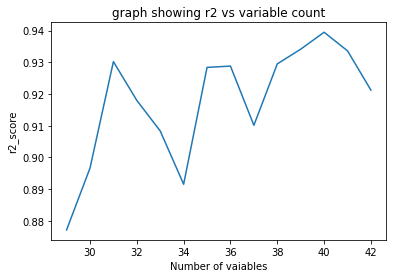

In [405]:
plt.plot(x_len,r2_list)
plt.xlabel("Number of vaiables")
plt.ylabel("r2_score")
plt.title("graph showing r2 vs variable count")
plt.show()

In [406]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
